# Business Understanding

## Project Domain

Domain: Kesehatan & Kebugaran Sub-Domain: Pencegahan & Manajemen Obesitas

Obesitas merupakan masalah kesehatan global yang semakin meningkat dan memiliki dampak serius pada kesehatan individu. Prediksi obesitas bertujuan untuk mengidentifikasi individu yang berisiko mengalami obesitas sehingga dapat dilakukan intervensi dini.

## Problem Statements

Masalah yang Dihadapi:
1. Ketidaktepatan Pemilihan Tanaman
  * Petani sering memilih tanaman berdasarkan pengalaman tradisional tanpa mempertimbangkan data ilmiah tentang kondisi tanah dan iklim.
  * Hal ini dapat menyebabkan hasil panen tidak optimal atau bahkan gagal.

2. Ketergantungan pada Ahli Pertanian
  * Konsultasi dengan ahli agronomi membutuhkan biaya dan waktu yang tidak selalu terjangkau oleh petani kecil.

3. Perubahan Iklim yang Tidak Terduga
  * Perubahan cuaca ekstrem memengaruhi produktivitas tanaman, sehingga diperlukan prediksi berbasis data.
4. Pemanfaatan Lahan yang Tidak Optimal
  * Tanah dengan kandungan nutrisi berbeda membutuhkan tanaman yang berbeda, tetapi petani sering menanam satu jenis tanaman secara terus-menerus, menyebabkan degradasi tanah.

## Goals

Tujuan:

Membangun sistem berbasis AI (Artificial Neural Network) yang dapat memprediksi risiko obesitas seseorang berdasarkan parameter:

Data Demografi: Usia, Gender
Riwayat Kesehatan: Riwayat keluarga obesitas, kondisi kesehatan saat ini
Gaya Hidup: Pola makan, aktivitas fisik, kebiasaan merokok, konsumsi alkohol
Parameter Fisik: Tinggi badan, berat badan, lingkar pinggang

## Solustion Statements

Solusi:

Machine Learning Model: Menggunakan Artificial Neural Network (ANN) untuk klasifikasi risiko obesitas. Model dilatih untuk memprediksi risiko obesitas dengan akurasi tinggi.
Aplikasi Web/Mobile: Membuat antarmuka yang mudah digunakan untuk memasukkan data dan mendapatkan hasil prediksi.
Visualisasi Data: Menyajikan data dan hasil prediksi dalam bentuk grafik dan visualisasi yang mudah dipahami.
Rekomendasi: Memberikan rekomendasi personal untuk pencegahan dan penanganan obesitas berdasarkan hasil prediksi.

# Data Understanding

## Import Data dari Kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"iryamuhammadghiffari","key":"e7402b94d36edd76c43519a137d57731"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d mrsimple07/obesity-prediction

Dataset URL: https://www.kaggle.com/datasets/mrsimple07/obesity-prediction
License(s): apache-2.0


In [ ]:
!mkdir obesity-prediction
!unzip obesity-prediction.zip -d obesity-prediction
!ls obesity-prediction

Archive:  obesity-prediction.zip
  inflating: obesity-prediction/obesity_data.csv  
obesity_data.csv


## Import Library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

## Exploratory Data Analysis

In [ ]:
df = pd.read_csv('obesity-prediction/obesity_data.csv')

In [ ]:
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


# Data Preparation

In [ ]:
# pisahkan fitur dan target
X = df.drop(columns=["Gender","ObesityCategory"])
y = df["ObesityCategory"]

In [ ]:
# Encode label target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
# Normalisasi fitur
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Bagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y_encoded,
                                                    test_size=0.2,
                                                    random_state=42)

# Modeling

In [ ]:
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(len(le.classes_), activation="softmax")
])

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,236 (43.89 KB)

 Trainable params: 11,236 (43.89 KB)

 Non-trainable params: 0 (0.00 B)

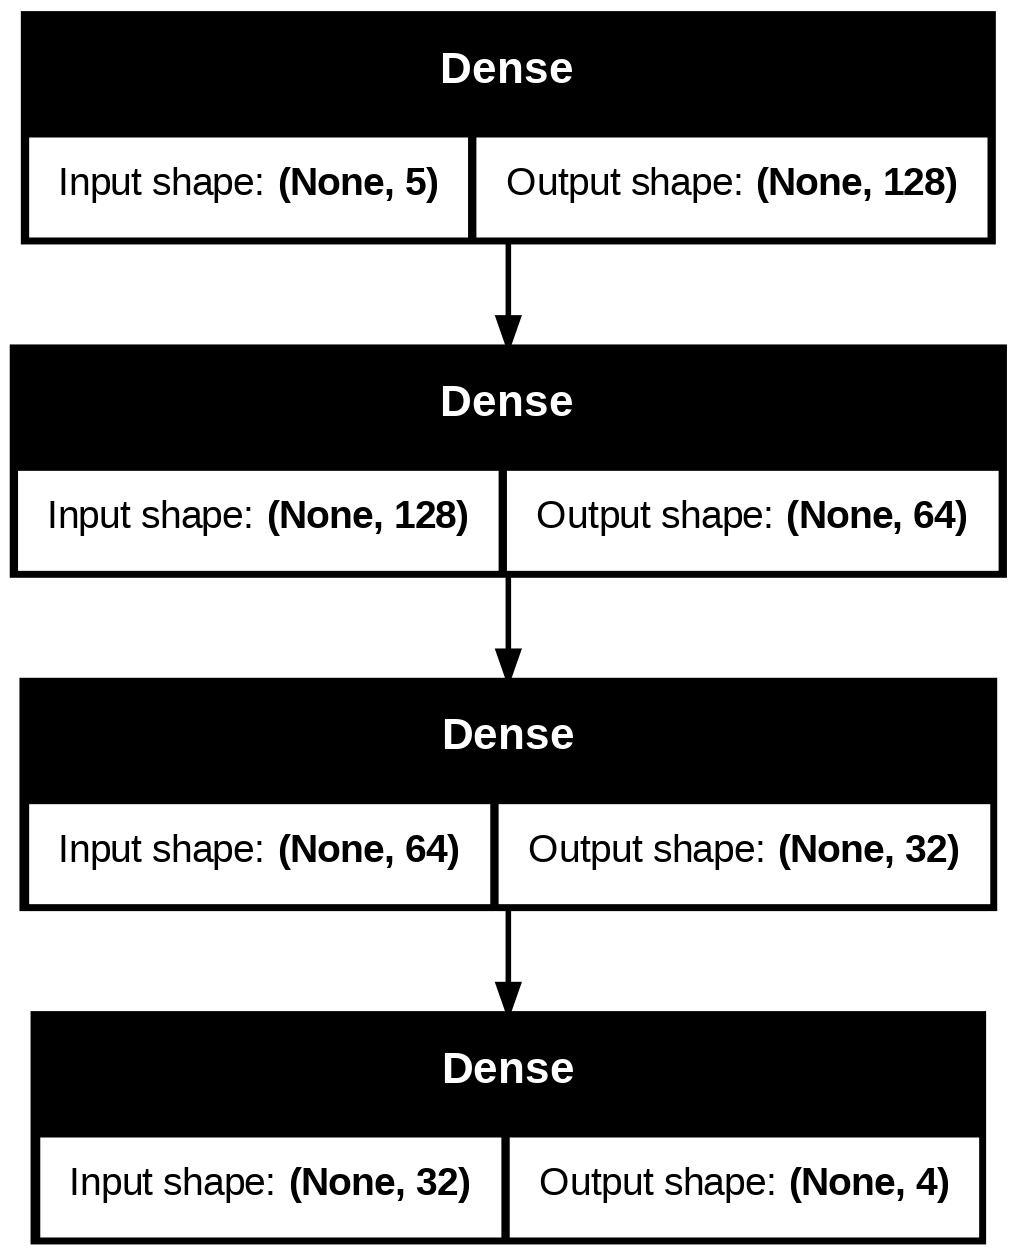

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=16,
                    validation_data=(X_test, y_test))

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3909 - loss: 1.3357 - val_accuracy: 0.4250 - val_loss: 1.1904
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5266 - loss: 1.0954 - val_accuracy: 0.7200 - val_loss: 0.7965
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7818 - loss: 0.6805 - val_accuracy: 0.8450 - val_loss: 0.4922
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8738 - loss: 0.4285 - val_accuracy: 0.8950 - val_loss: 0.3307
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9203 - loss: 0.2864 - val_accuracy: 0.9350 - val_loss: 0.2518
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9305 - loss: 0.2253 - val_accuracy: 0.9450 - val_loss: 0.2155
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9438 - loss: 0.1932 - val_accuracy: 0.9600 - val_loss: 0.1837
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9365 - loss: 0.1804 - val_accuracy: 0.9350 - v

# Evaluation

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Akurasi Model: {test_accuracy:.4f}")
print(f"Loss Model: {test_loss:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9795 - loss: 0.0545 
Akurasi Model: 0.9800
Loss Model: 0.0490


In [ ]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

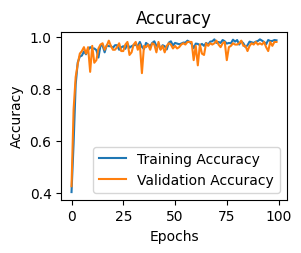

In [ ]:
plt.subplot(2, 2, 4)
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

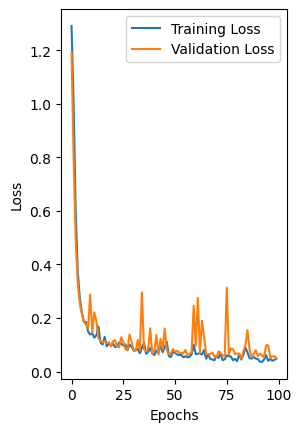

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


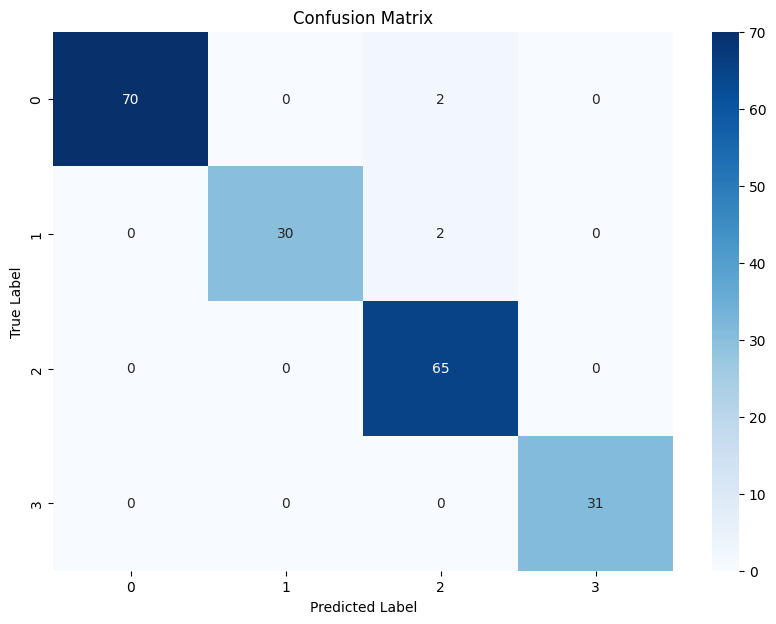

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        72
           1       1.00      0.94      0.97        32
           2       0.94      1.00      0.97        65
           3       1.00      1.00      1.00        31

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Deployment

## Model Simulation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
sample_input = np.array([[20, 175, 75, 24, 4]])
sample_input_df = pd.DataFrame(sample_input)

In [ ]:
sample_input_scaled = scaler.transform(sample_input_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
predicted_class = np.argmax(model.predict(sample_input_scaled))
predicted_crop = le.inverse_transform([predicted_class])

print(f"Apakah terdeteksi obesitas: {predicted_crop[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Apakah terdeteksi obesitas: Normal weight


## Save Model

In [ ]:
# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model
with open('obesity-prediction.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpppulqb5i'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 5), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  139408556374352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139408556375504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139408556373776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139408556375696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139408556372624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139408556372240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139408556375888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139408556374736: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
# Simpan label encoder dan scaler
import joblib
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']